###1) 필요한 패키지 불러오기

In [ ]:
import pandas as pd #자료를 읽기 위해 불러옴
import matplotlib.pyplot as plt #시각화하기 위해 불러옴
from gensim.models.word2vec import Word2Vec #Word2Vec을 위해 불러옴
!pip install konlpy #형태소분석기를 사용하기 위해 외부기능 설치
from konlpy.tag import Okt #형태소분석을 하기 위해 불러옴
from tqdm import tqdm #진행상황 확인
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #Doc2Vec을 위해 불러옴
from sklearn.cluster import KMeans #Kmeans 군집기법을 사용하기 위해 불러옴

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.6 MB/s eta 0:00:00


###2) 자료 읽기

In [ ]:
data = pd.read_csv("train_df.csv",encoding = 'cp949')

###3) 비어있는 리스트에 불용어 정의 후 토크나이즈 한 명사만 추출하기

In [ ]:
tokenized_data = []

# 불용어 정의
stopwords = ['을',
             '부터', '까지' '적', '의','가','이','은',
             '들','는','좀','잘','걍','과','도','를','으로',
             '자','에','와','한','하다', '점', '나']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in tqdm(data['발화문']): #발화문 각각에 대해서 아래작업 반복
    tokenized_sentence = okt.nouns(sentence)  #각 발화문에서 명사만 뽑아서 리스트
    #위에서 명사만 추출한 결과에서, 각 명사가 stopwords인지 체크하고
    #stopwords 아닌 명사만 사용함
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 29360/29360 [01:48<00:00, 270.23it/s]


In [ ]:
tokenized_data

[['혹시', '플라워', '스마트', '톡', '케이스', '블루', '수'],
 ['현재', '배송', '중', '교환'],
 ['속도', '리더', '기만', '교환', '불량', '리더', '기도', '택배', '하나요'],
 ['네', '리더', '기만', '불량', '교환', '문의'],
 ['다시', '교환'],
 ['커버', '사은', '품', '필수', '성품'],
 ['불량', '거', '택배', '박스', '거', '반품', '거'],
 ['회수', '확인', '후', '처리'],
 ['배송', '방금', '반품', '물건', '테', '잎', '사용설명서', '교환', '접수'],
 ['문의', '내용', '테이프', '저희', '수입', '과정', '중', '경우'],
 ['로크', '그레이', '사진', '스퀘어', '그레이', '잘못', '구입', '교환', '거'],
 ['판매',
  '페이지',
  '옵션',
  '번호',
  '상품',
  '등록',
  '내용',
  '변경',
  '수',
  '구매',
  '당시',
  '지금',
  '판매',
  '페이지',
  '상품',
  '옵션',
  '번호',
  '변경',
  '고객',
  '구매',
  '당시',
  '번',
  '로크',
  '그레이',
  '제품'],
 ['개', '주문', '개', '불량', '개', '다시', '수', '가요'],
 ['해당',
  '제품',
  '우편',
  '발송',
  '경우',
  '하나',
  '상품',
  '드릴',
  '수',
  '상품',
  '먼저',
  '폐기',
  '우편',
  '수령',
  '후',
  '정상',
  '제품',
  '확인',
  '후',
  '폐기',
  '주소지',
  '오늘',
  '발송'],
 ['바이올렛', '개', '주문', '개', '핑크색', '요'],
 ['현재', '고객', '구매', '역', '확인', '변경', '드릴', '수'],
 ['지금',
  '일반',
  '회수',
  '후'

###4) 토크나이즈 된 데이터로 Doc2Vec 적용


In [ ]:
TaggedDocument(words=["감","대추"], tags=[1])

TaggedDocument(words=['감', '대추'], tags=[1])

In [ ]:
tagged_data = [TaggedDocument(words=tokenized_data[i], tags=[i]) for i in range(len(tokenized_data)) ]

In [ ]:
model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=10,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

In [ ]:
model.dv.index_to_key

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
model.dv.vectors

array([[-0.05230815, -0.05979127, -0.09880754, ..., -0.05166649,
        -0.09717963,  0.02010779],
       [ 0.02830311,  0.04643556, -0.04297275, ...,  0.09225623,
        -0.09501867, -0.03458086],
       [-0.03769909,  0.02607382, -0.05691557, ..., -0.09954669,
         0.04933045, -0.09122308],
       ...,
       [-0.09746721, -0.01619705,  0.06578064, ..., -0.04234382,
         0.04962515,  0.08873423],
       [-0.07049143,  0.09081516, -0.06065207, ...,  0.02807574,
        -0.09861462, -0.05972289],
       [-0.0402303 , -0.02659255, -0.02232715, ...,  0.09995905,
        -0.05937933,  0.08291507]], dtype=float32)

###5) Doc2Vec한 데이터로 Kmeans 군집분석하기

In [ ]:
docvec = model.docvecs.vectors

x=[3,4,5,6,7,8,9,10,11]
y=[]
for i in [3,4,5,6,7,8,9,10,11]:
  model1 = KMeans(n_clusters=i, random_state=0, algorithm='auto')
  model1.fit(docvec)
  y.append(model1.inertia_)

<ipython-input-14-d43f4d3b0fe0>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  docvec = model.docvecs.vectors
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.

In [ ]:
y

[860.8873291015625,
 825.2017822265625,
 797.11328125,
 773.3095703125,
 753.2135009765625,
 733.4599609375,
 718.1741943359375,
 702.7545166015625,
 689.2922973632812]

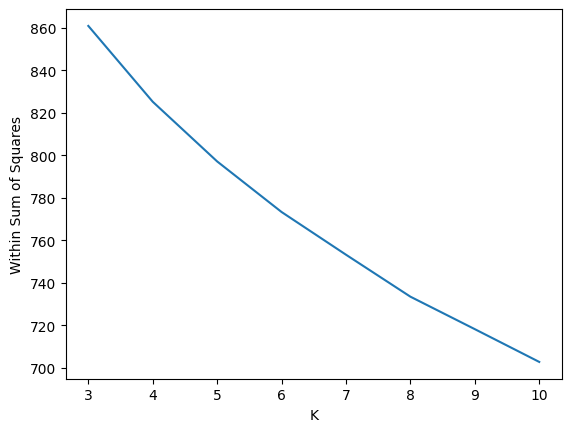

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x[0:8],y[0:8])
plt.xlabel("K")
plt.ylabel("Within Sum of Squares")
plt.show()

In [ ]:
model_final = KMeans(n_clusters=9, random_state=0, algorithm='auto')
model_final.fit(model.docvecs.vectors)


<ipython-input-17-eb15cce4c322>:2: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  model_final.fit(model.docvecs.vectors)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=9, random_state=0)

In [ ]:
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
print(model_final.cluster_centers_)

[[ 0.009 -0.021  0.042 -0.026 -0.003  0.041 -0.009 -0.044 -0.035  0.027]
 [ 0.002  0.035 -0.046  0.026  0.003  0.026  0.001 -0.036  0.033  0.045]
 [-0.009 -0.036  0.034  0.051 -0.013  0.025  0.013  0.024  0.041 -0.023]
 [-0.044  0.013 -0.038 -0.013  0.007  0.035  0.014  0.025 -0.037 -0.041]
 [-0.036  0.018  0.022 -0.027  0.003 -0.043  0.002 -0.046  0.036 -0.03 ]
 [ 0.055  0.036  0.002 -0.036 -0.002  0.009 -0.021  0.033  0.022 -0.035]
 [-0.013 -0.048 -0.024 -0.039  0.    -0.029 -0.001  0.037  0.013  0.045]
 [ 0.035 -0.035 -0.028  0.034  0.003 -0.035 -0.012 -0.03  -0.037 -0.027]
 [-0.002  0.043  0.038  0.028  0.001 -0.031  0.009  0.034 -0.035  0.039]]


In [ ]:
data['cluster'] = model_final.labels_

클러스터별 단어 출력하고 고빈도 단어 출력해서 해석하기

In [ ]:
total = []

for j in [0,1,2,3,4,5,6,7,8]:
  idx1 = data[ data['cluster']==j ].index
  temp = list(idx1.astype("int").values)
  idx1list=[]
  for j in temp:
    for q in tokenized_data[j]:
     if q not in idx1list:
       idx1list.append(q)
  total.append( idx1list)



In [ ]:
total[8]

['현재',
 '배송',
 '중',
 '교환',
 '누가',
 '컴퓨터',
 '작업',
 '타자',
 '칠',
 '때',
 '신경',
 '노이즈',
 '때문',
 '요청',
 '지금',
 '진행',
 '어디',
 '갑자기',
 '한쪽',
 '소리',
 '안',
 '요',
 '접수',
 '해주시',
 '수거',
 '품',
 '하루',
 '제품',
 '메모',
 '기재',
 '저희',
 '쪽',
 '택배',
 '이용',
 '반송',
 '새',
 '상품',
 '냄새',
 '일',
 '수',
 '사용',
 '재판매',
 '반품',
 '애초',
 '고장',
 '난',
 '게',
 '매일',
 '주일',
 '니',
 '돈',
 '라이',
 '건가',
 '두',
 '개',
 '구입',
 '바람',
 '세기',
 '위',
 '아래',
 '버튼',
 '모두',
 '그냥',
 '불량',
 '터보',
 '헤드',
 '봉',
 '바로',
 '걸',
 '말',
 '것',
 '금일',
 '처리',
 '회수',
 '미리',
 '포장',
 '구매',
 '후기',
 '글',
 '매트',
 '한여름',
 '취침',
 '온도',
 '날씨',
 '도로',
 '부모님',
 '집',
 '확인',
 '다시',
 '대요',
 '바퀴',
 '환불',
 '방향',
 '말씀',
 '주시',
 '제시',
 '신',
 '역',
 '및',
 '신청',
 '클레',
 '임',
 '기사',
 '하자',
 '려고',
 '박스',
 '그',
 '충전',
 '케이블',
 '무마',
 '여유',
 '버렷는데',
 '문의',
 '블랙',
 '화이트',
 '고정',
 '아예',
 '회전',
 '부품',
 '재배',
 '송해',
 '머',
 '겁',
 '미니',
 '라디에이터',
 '핀',
 '품절',
 '판매',
 '가격',
 '기본',
 '노',
 '출입',
 '예',
 '네',
 '조절',
 '기만',
 '내',
 '예정',
 '대로',
 '출고',
 '발송',
 '꼭',
 '취소',
 '물건',
 '왜',
 '컬러',
 

In [ ]:
x

[3, 4, 5, 6, 7, 8, 9, 10, 11]

In [ ]:
pred=model1.predict(model.docvecs.vectors)
pred
len(pred)

<ipython-input-23-59e69e81b0b8>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  pred=model1.predict(model.docvecs.vectors)


29360

###6) Doc2vec->intent 분류

In [ ]:
data.인텐트.value_counts()

인텐트
교환|반품|환불_일반_질문    9541
교환|반품|환불_시간_질문    7130
교환|반품|환불_방법_질문    6699
교환|반품|환불_비용_질문    2951
교환|반품|환불_방법_요청    1705
교환|반품|환불_일반_요청     376
교환|반품|환불_시간_요청     356
교환|반품|환불_일반_확인     206
교환|반품|환불_방법_확인     148
교환|반품|환불_비용_요청      88
교환|반품|환불_시간_확인      76
교환|반품|환불_비용_확인      64
교환|반품|환불_방법_비교      10
교환|반품|환불_일반_비교       6
교환|반품|환불_시간_비교       2
교환|반품|환불_비용_비교       2
Name: count, dtype: int64

In [ ]:
cat = data.인텐트.unique()
print(cat)
#일반:0, 시간, 비용, 방법:1
data.intent = data.인텐트.map({cat[0]:0, cat[1]:1, cat[2]:1,cat[3]:0, cat[4]:0,cat[5]:1,
                            cat[6]:1, cat[7]:0,cat[8]:1, cat[9]:1, cat[10]:1, cat[11]:1,
                            cat[12]:1, cat[13]:1, cat[14]:1, cat[15]:1})
data.intent.value_counts()

model = Doc2Vec(
    epochs=40,
    window=5,
    vector_size=100,
    min_count=2,  #최소 단어 빈도를 2
    dm =1)  #pv-dm: 1, pv-dbow:2

model.build_vocab(tagged_data)

<ipython-input-25-f9db4dfbd3a7>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.intent = data.인텐트.map({cat[0]:0, cat[1]:1, cat[2]:1,cat[3]:0, cat[4]:0,cat[5]:1,


['교환|반품|환불_일반_요청' '교환|반품|환불_시간_확인' '교환|반품|환불_시간_비교' '교환|반품|환불_일반_질문'
 '교환|반품|환불_일반_확인' '교환|반품|환불_비용_확인' '교환|반품|환불_방법_확인' '교환|반품|환불_일반_비교'
 '교환|반품|환불_비용_질문' '교환|반품|환불_시간_요청' '교환|반품|환불_방법_요청' '교환|반품|환불_비용_비교'
 '교환|반품|환불_시간_질문' '교환|반품|환불_비용_요청' '교환|반품|환불_방법_질문' '교환|반품|환불_방법_비교']


In [ ]:
X = model.dv.vectors
y = data.intent

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model = KNeighborsClassifier().fit(X_train, y_train)
clf = RandomForestClassifier().fit(X_train, y_train)

clf.score( X_train, y_train)

1.0

In [1]:
pred = clf.predict( X_test)
pred

NameError: name 'clf' is not defined

In [ ]:
from sklearn.metrics import classification_report
print( classification_report( y_test, pred))

              precision    recall  f1-score   support

           0       0.42      0.01      0.01      2026
           1       0.66      1.00      0.79      3846

    accuracy                           0.65      5872
   macro avg       0.54      0.50      0.40      5872
weighted avg       0.58      0.65      0.52      5872

